In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:

!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 649M/658M [00:06<00:00, 94.1MB/s]
100% 658M/658M [00:06<00:00, 105MB/s] 


In [ ]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:

imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [ ]:
import os
class_names = os.listdir(imgs_path)
class_names

['Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Early_blight',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Potato___healthy',
 'Tomato_healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Leaf_Mold']

In [ ]:
import cv2
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [ ]:
def get_data(data_dir):
    img_data = []
    labels = []
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                if img_arr is not None:  # Check if the image is not empty
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                    img_data.append(resized_arr)
                    labels.append(class_num)
                else:
                    print(f"Error: Could not read image {img} in path {path}")
            except Exception as e:
                print(e)
    return np.array(img_data), np.array(labels)

In [ ]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')


Error: Could not read image svn-r6Yb5c in path PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus
the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


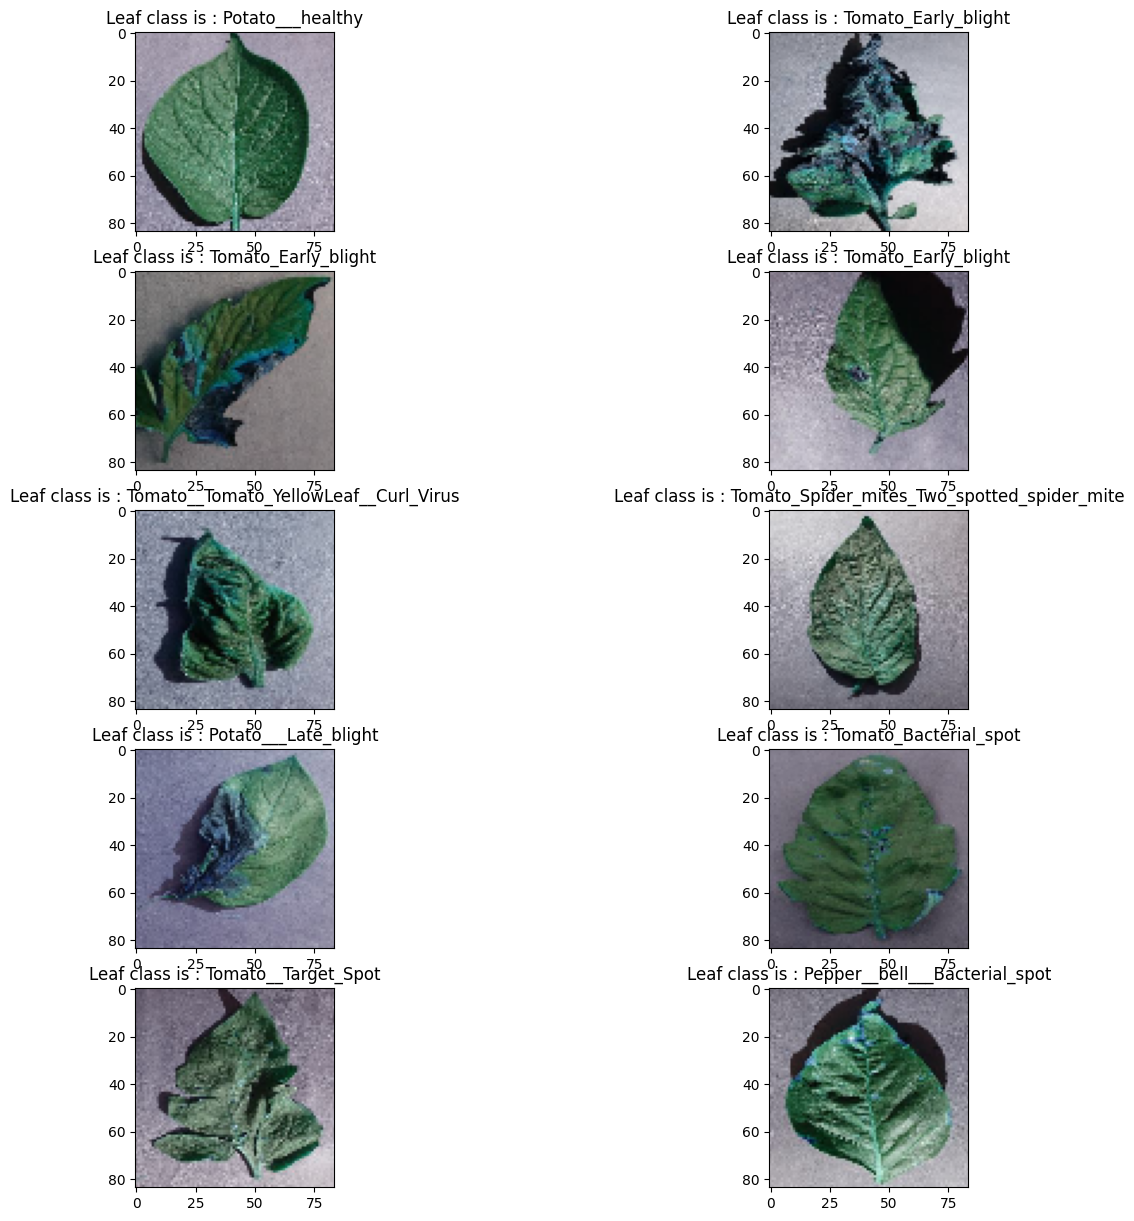

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]


array([[[ 0.05882359,  0.06666672,  0.17647064],
        [ 0.05098045,  0.05882359,  0.17647064],
        [ 0.09019613,  0.09803927,  0.20784318],
        ...,
        [-0.05882353, -0.05882353,  0.06666672],
        [-0.14509803, -0.14509803, -0.01960784],
        [-0.08235294, -0.08235294,  0.04313731]],

       [[ 0.06666672,  0.07450986,  0.18431377],
        [ 0.04313731,  0.05098045,  0.16078436],
        [ 0.12156868,  0.12941182,  0.23921573],
        ...,
        [ 0.01176476,  0.01176476,  0.13725495],
        [-0.09019607, -0.09019607,  0.02745104],
        [ 0.04313731,  0.04313731,  0.1686275 ]],

       [[ 0.13725495,  0.14509809,  0.254902  ],
        [ 0.10588241,  0.11372554,  0.22352946],
        [ 0.09019613,  0.09019613,  0.20784318],
        ...,
        [-0.01176471, -0.01176471,  0.11372554],
        [-0.08235294, -0.08235294,  0.04313731],
        [-0.12156862, -0.12156862,  0.01176476]],

       ...,

       [[ 0.20000005,  0.20000005,  0.2941177 ],
        [ 0

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [ ]:
del img_data,labels


In [ ]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 2, 2, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,032,079 (76.42 MB)

 Trainable params: 4,727,311 (18.03 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

In [ ]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=batch_size)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2212s 9s/step - accuracy: 0.5807 - loss: 1.3803 - val_accuracy: 0.8249 - val_loss: 0.5288
Epoch 2/50
 26/258 ━━━━━━━━━━━━━━━━━━━━ 26:41 7s/step - accuracy: 0.8624 - loss: 0.4325

In [ ]:
# Save the trained model
model2.save('/content/drive/MyDrive/plant.keras')


In [ ]:
# Save the trained model
model2.save('/content/drive/MyDrive/plant_disease_model.h5')


Text(0.5, 1.0, 'val accuracy')

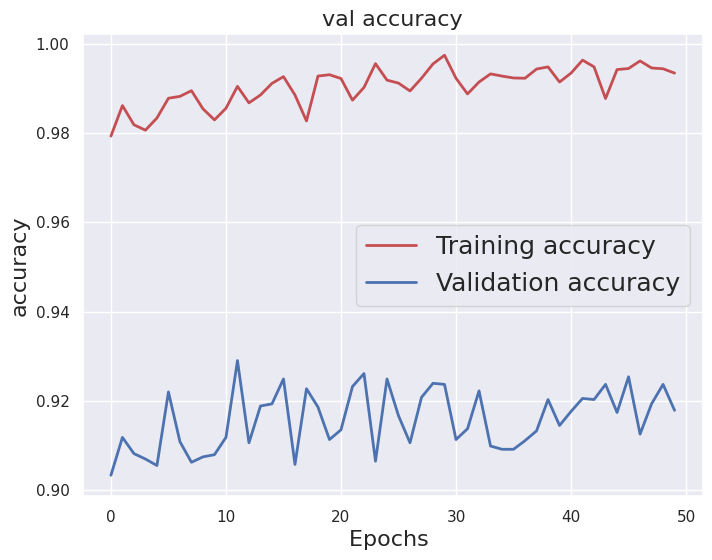

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])

129/129 [==============================] - 5s 35ms/step - loss: 0.8265 - accuracy: 0.9179
accuracy of the model is  0.9178779125213623


(1, 84, 84, 3)

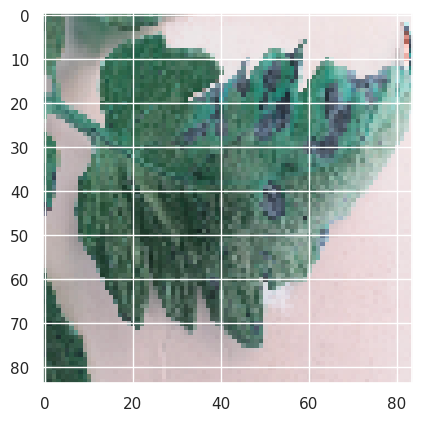

In [ ]:
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='/content/tomato target spot.jpg'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 [==============================] - 0s 20ms/step
[[1.8113629e-13 9.2055256e-14 3.0975717e-17 5.8956179e-21 6.6722296e-29
  6.3158823e-23 9.5988311e-05 4.9403068e-12 9.9974114e-01 5.7171374e-18
  1.9717446e-20 4.5862476e-19 1.6273148e-04 2.3590073e-07 1.2388563e-14]]
output is  Tomato_Late_blight


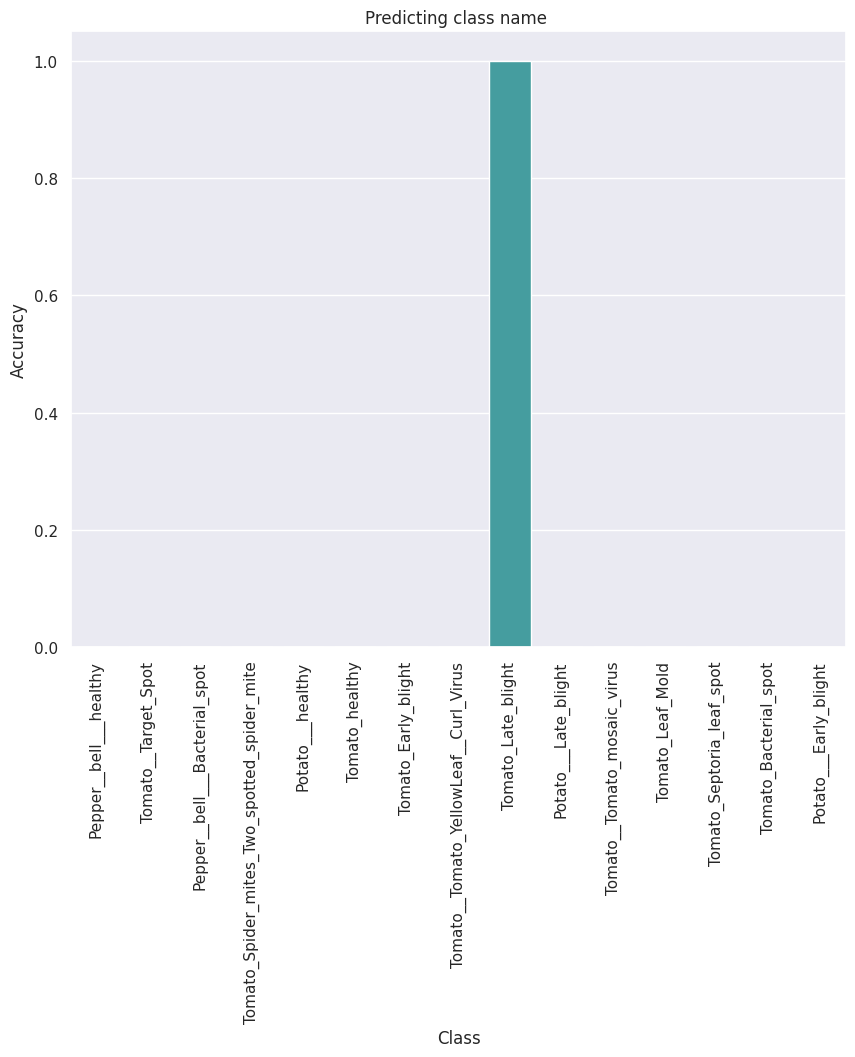

In [ ]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()


In [ ]:
! pip install streamlit -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com


34.72.98.114


In [ ]:
! streamlit run '/content/drive/MyDrive/app.py' & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.72.98.114:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://moody-owls-know.loca.lt
2024-07-30 02:56:39.692484: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 02:56:39.692553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 02:56:39.695372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 02:56:39.712174: I tensorflow/core/platform/cpu_featu